In [2]:
# Section 1
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import re
# from nltk.corpus import stopwords

nltk.download('punkt')

#Create a Finnish instance
stemmer = SnowballStemmer("finnish")

# Function to remove stopwords, punctuation, numbers, and check if the keyword is in the text
def preprocess_text(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [stemmer.stem(word) for word in tokens if not any(char in word for char in string.punctuation) and word not in stopwords_list and not any(char.isdigit() for char in word)]
    
    return ' '.join(filtered_tokens)

def contains_keyword(text):
    text = str(text)
    tokens = word_tokenize(text)
    return any(translation in tokens for translation in translations)

# Download the Finnish stopwords list and save it as "finnish_stopwords.txt"
# Then load the stopwords from the file
with open('finnish_stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords_list = file.read().splitlines()

# Selected keywords
# selected_keyword = ["well-being", "happiness", "quality of life", "health"]
# translations = ["hyvinvointi", "vointi"]
translations = ["ilmastonmuutos"]
# translations = ["hyvinvointi", "vointi", "onnellisuus", "elämänlaatu", "terveys", "terveydentila"]
# translations = ["hyvinvointi", "vointi", "onnellisuus", "onni", "elämänlaatu", "terveys", "terveydentila"]
translations = [stemmer.stem(word) for word in translations]
# translations = translations + selected_keyword

filtered_threads_total = pd.DataFrame(columns=['title', 'thread_text', 'datetime'])

# Loop for reading from 2001 to 2020 dataset
for i in range(1, 21):
    # Load the CSV file into a DataFrame
    data_file_name = f'data/parsed_data_{i}.csv'
    df = pd.read_csv(data_file_name)

    # Filter out only threads
    threads_df = df[df['msg_type'] == 'thread_start']

    # Filter threads containing the keyword in title or thread_text
    threads_df.loc[:, 'thread_text'] = threads_df['thread_text'].apply(preprocess_text)
    threads_df.loc[:, 'title'] = threads_df['title'].apply(preprocess_text)
    threads_df.loc[:, 'datetime'] = pd.to_datetime(threads_df['datetime'])
    threads_df.dropna(inplace=True, how='any')
    filtered_threads = threads_df[threads_df['title'].apply(contains_keyword) | threads_df['thread_text'].apply(contains_keyword)]
    filtered_threads_total = pd.concat([filtered_threads_total, filtered_threads], ignore_index=True)
    print(f"{i} year of data processing finished!")
    
# Save the filtered results to a new CSV file
filtered_threads_total[['title', 'thread_text', 'datetime']].to_csv('data/filtered_threads_f1.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aghaffar23\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


1 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


2 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


3 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


4 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


5 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


6 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


7 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


8 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


9 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


10 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


11 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


12 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


13 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


14 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


15 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


16 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


17 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


18 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


19 year of data processing finished!


C:\Users\aghaffar23\AppData\Local\Temp\ipykernel_10996\3636102007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threads_df.dropna(inplace=True, how='any')


20 year of data processing finished!


In [ ]:
# # filter sub keywords for section 1 for testing the result
# import pandas as pd
# from nltk.tokenize import word_tokenize
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer("finnish")
# translations = ["hyvinvointi", "vointi", "onnellisuus", "elämänlaatu", "terveys", "terveydentila"]

# translations = [stemmer.stem(word) for word in translations]

# def contains_keyword(text):
#     text = str(text)
#     tokens = word_tokenize(text)
#     return any(translation in tokens for translation in translations)

# # Load the dataset
# df = pd.read_csv('data/filtered_threads_3.csv')
# filtered_threads = df[df['title'].apply(contains_keyword) | df['thread_text'].apply(contains_keyword)]

# filtered_threads_total[['title', 'thread_text', 'datetime']].to_csv('data/filtered_threads_f1.csv', index=False)

In [1]:
#Section 2
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
df = pd.read_csv('data/filtered_threads_f1.csv')  

# Function to extract the year from the 'datetime' column
def extract_year(date_string):
    return int(date_string[:4])

# Create a dictionary to store sub-datasets for each year
yearly_datasets = {}

# Loop through the dataset and separate data for each year
for year in range(2001, 2021):
    # Filter data for the current year
    data_for_year = df[df['datetime'].apply(lambda x: extract_year(x) == year)]
    yearly_datasets[f'{year}'] = data_for_year

# Function to calculate vocabulary for each year
# def get_vocabulary(data):
#     tokens = []
#     for text in data['thread_text']:
#         if isinstance(text, str):  # Check if text is a valid string
#             text = text.lower()  # Convert to lowercase for consistency
#             tokens.extend(word_tokenize(text))
#     fdist = FreqDist(tokens)
#     return fdist  # Use FreqDist to get word frequencies

def get_vocabulary(data):
    vectorizer = CountVectorizer()
    vectorized = vectorizer.fit(data)
    return vectorized

# Create a dictionary to store the vocabulary for each year
vocabulary_by_year = {}
tokens_by_year = {}

# Calculate vocabulary for each year
for year, data in yearly_datasets.items():
    if data.empty:
        vocabulary_by_year[year] = 0
        continue
    year_vocabulary = get_vocabulary(data['thread_text'])
    total_unique_vocab = len(year_vocabulary.vocabulary_.keys())
    total_vocab_size = sum(year_vocabulary.vocabulary_.values())
    vocabulary_by_year[year] = total_unique_vocab
    tokens_by_year[year] = total_vocab_size

# Print or manipulate the vocabulary data as needed
for year, vocab_size in vocabulary_by_year.items():
    print(f"Year {year}: Vocabulary Size = {vocab_size}")

Year 2001: Vocabulary Size = 9214
Year 2002: Vocabulary Size = 19964
Year 2003: Vocabulary Size = 31562
Year 2004: Vocabulary Size = 47093
Year 2005: Vocabulary Size = 56112
Year 2006: Vocabulary Size = 74715
Year 2007: Vocabulary Size = 69367
Year 2008: Vocabulary Size = 63538
Year 2009: Vocabulary Size = 53999
Year 2010: Vocabulary Size = 44343
Year 2011: Vocabulary Size = 41485
Year 2012: Vocabulary Size = 41016
Year 2013: Vocabulary Size = 36731
Year 2014: Vocabulary Size = 39253
Year 2015: Vocabulary Size = 40803
Year 2016: Vocabulary Size = 36739
Year 2017: Vocabulary Size = 29377
Year 2018: Vocabulary Size = 26378
Year 2019: Vocabulary Size = 26174
Year 2020: Vocabulary Size = 26785


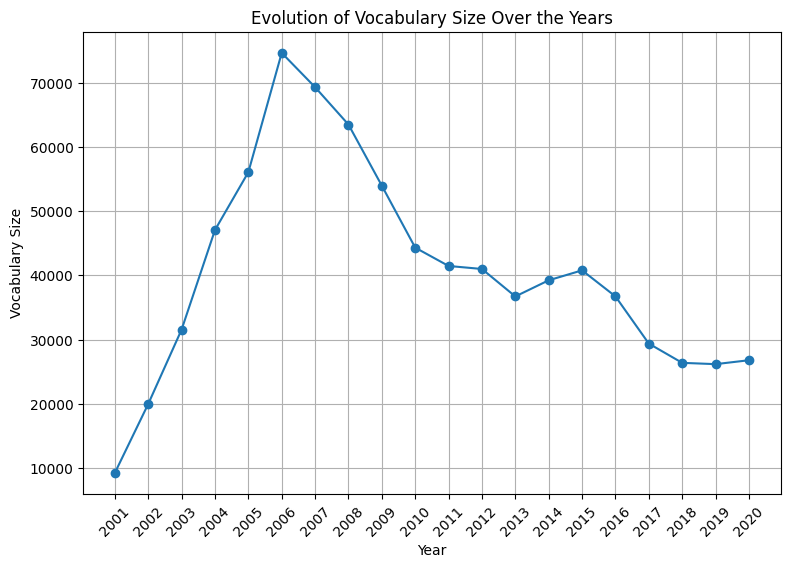

In [4]:
#Section3
import matplotlib.pyplot as plt

# Extract require data
years = list(vocabulary_by_year.keys())
vocab_sizes = [vocab for vocab in vocabulary_by_year.values()]

# Create a line plot to show vocabulary evolution over the years
plt.figure(figsize=(9, 6))
plt.plot(years, vocab_sizes, marker='o', linestyle='-')
plt.title('Evolution of Vocabulary Size Over the Years')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Vocabulary Size')
plt.grid(True)
plt.show()


2001 data processing for ploting done!
Year 2001, 99.99999000000001% Confidence: 80 points outside bounds
Year 2001, 85.0% Confidence: 145 points outside bounds
Year 2001, 90.0% Confidence: 141 points outside bounds
Year 2001, 95.0% Confidence: 138 points outside bounds


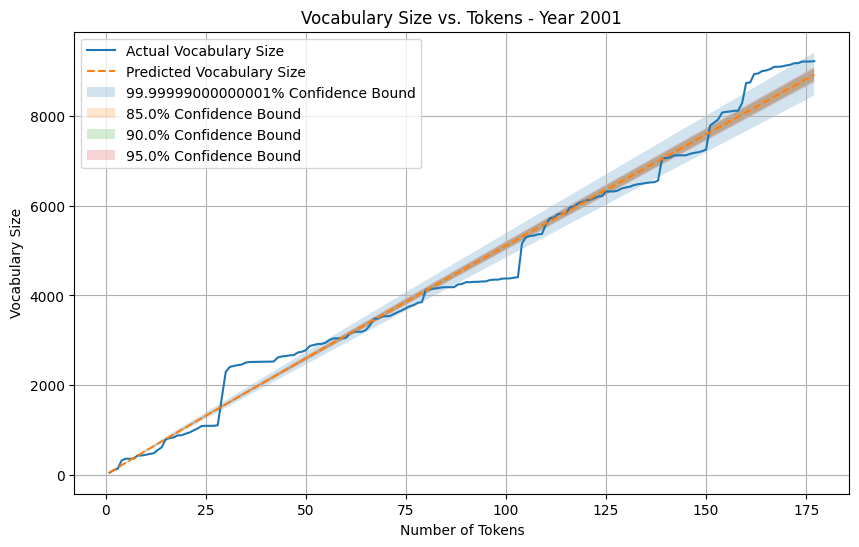

2001 plot done!


In [16]:
#Section 4
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

results = {}
confidence_levels = [0.8, 0.85, 0.9, 0.95]


# Loop for each year
for year, data in yearly_datasets.items():
    tokens = []
    vocab_sizes = []
    text_v = {}
    # if year!='2001':
    #     vocabulary_by_year[year] = 0
    #     continue

    for text in data['thread_text']:
        get_vocab_temp = dict(get_vocabulary([text]).vocabulary_.items())
        text_v = {k: text_v.get(k, 0) + get_vocab_temp.get(k, 0) for k in set(text_v) | set(get_vocab_temp)}
        vocab_sizes.append(len(text_v.keys()))
        tokens.append(sum(text_v.values()))
        # if isinstance(text, str):
        #     tokenized = word_tokenize(text)
        #     tokens.extend(tokenized)
        #     vocab_sizes.append(len(set(tokens)))

    # Check if there is data for this year
    if not tokens :
        continue

    # Create a dictionary to store the vocabulary for each year
    vocabulary_by_year = {}
    tokens_by_year = {}

    year_vocabulary = get_vocabulary(data['thread_text'])
    total_unique_vocab = len(year_vocabulary.vocabulary_.keys())
    total_vocab_size = sum(year_vocabulary.vocabulary_.values())
    vocabulary_by_year[year] = total_unique_vocab
    tokens_by_year[year] = total_vocab_size


    # Linear regression (Heaps law)
    x = np.arange(1, len(vocab_sizes) + 1) 

    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(x), np.log(vocab_sizes))

    predicted_vocab_sizes = np.exp(slope * np.log(x) + intercept)

    # Calculate the upper and lower bounds based on  confidence level
    bounds = []
    for confidence in confidence_levels:
        n = len(tokens)
        t = stats.t.ppf(1 - (1 - confidence) / 2, n - 2)
        prediction_interval = t * std_err * np.sqrt(1 + 1 / n + (np.log(x) - np.mean(np.log(x))) ** 2 / ((n - 1) * np.var(np.log(x))))
        upper_bound = predicted_vocab_sizes * np.exp(prediction_interval)
        lower_bound = predicted_vocab_sizes / np.exp(prediction_interval)
        bounds.append((upper_bound, lower_bound))

    results[year] = {
        'tokens': tokens,
        'vocab_sizes': vocab_sizes,
        'predicted_vocab_sizes': predicted_vocab_sizes,
        'confidence_bounds': bounds
    }
    print(f"{year} data processing for ploting done!")

# Plot graphs - years 
for year, data in results.items():
    # if year!='2001':
    #     vocabulary_by_year[year] = 0
    #     continue
    plt.figure(figsize=(10, 6))
    x = np.arange(1, len(data['vocab_sizes']) + 1)  
    plt.plot(x, data['vocab_sizes'], label='Actual Vocabulary Size')
    plt.plot(x, data['predicted_vocab_sizes'], label='Predicted Vocabulary Size', linestyle='--')
    for i, confidence in enumerate(confidence_levels):
        plt.fill_between(x, data['confidence_bounds'][i][0], data['confidence_bounds'][i][1], alpha=0.2, label=f'{confidence*100}% Confidence Bound')
    plt.title(f'Vocabulary Size vs. Tokens - Year {year}')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Vocabulary Size')
    plt.legend()
    plt.grid(True)

    # Count points outside the bounds for each confidence level
    for i, confidence in enumerate(confidence_levels):
        upper_bound = data['confidence_bounds'][i][0]
        lower_bound = data['confidence_bounds'][i][1]
        outside_bounds = sum((data['vocab_sizes'] > upper_bound) | (data['vocab_sizes'] < lower_bound))
        print(f"Year {year}, {confidence*100}% Confidence: {outside_bounds} points outside bounds")

    plt.show()
    print(f"{year} plot done!")




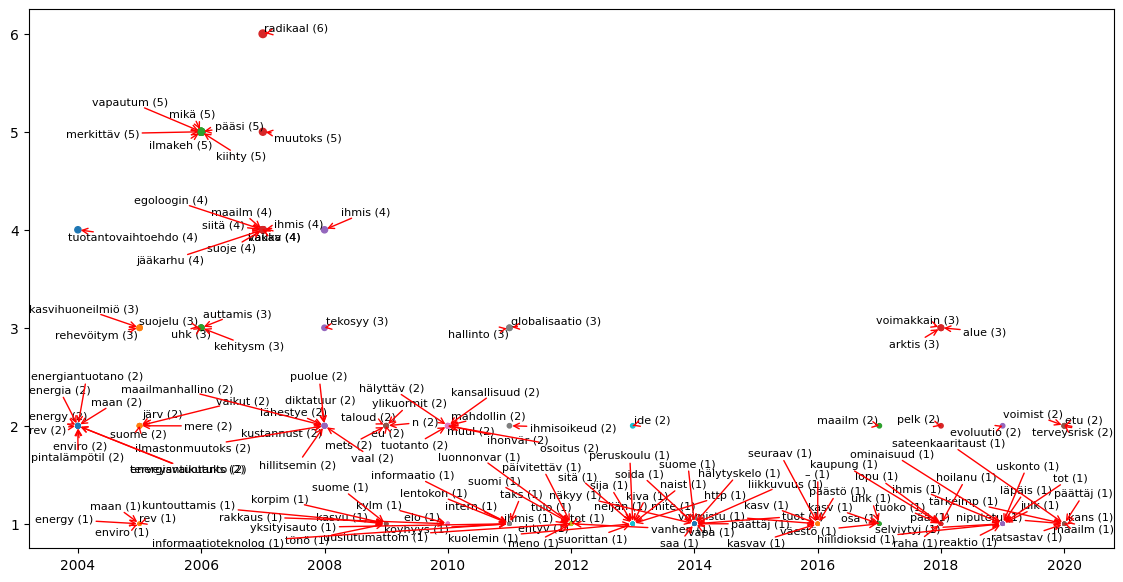

In [27]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
from nltk.stem.snowball import SnowballStemmer

# Initialize stemmer
stemmer = SnowballStemmer("finnish")
# Single keyword
keyword = stemmer.stem("ilmastonmuutos")

df = pd.read_csv('data/filtered_threads.csv')

# Function - find the most frequent co-occurring words
def find_most_frequent_co_occurring_words(data, keyword):
    tokens = word_tokenize(data['thread_text'].str.cat(sep=' '))
    keyword_indices = [i for i, token in enumerate(tokens) if token == keyword]

    # Initialize a FreqDist
    fdist = FreqDist()
    # Define the window size (3 units)
    window_size = 3

    for keyword_index in keyword_indices:
        window_start = max(0, keyword_index - window_size)
        window_end = min(len(tokens), keyword_index + window_size + 1)
        window_words = tokens[window_start:window_end]
        fdist.update(window_words)

    # Exclude the keyword itself
    del fdist[keyword]

    # Get the 10 most frequent words
    top_words = fdist.most_common(10)

    return top_words

# Initialize a dictionary to store the results
results = {}

for year in range(2001, 2021): 
    year_data = df[df['datetime'].str.startswith(str(year))]
    top_words = find_most_frequent_co_occurring_words(year_data, keyword)
    results[year] = top_words

# Plot
plt.figure(figsize=(14, 7))
texts = []
for year, top_words in results.items():
    if top_words:
        x, y = zip(*top_words)
        x = [year] * len(x)  # Make x a list of the same year value
        sizes = [freq * 5 for freq in y]  # Scale sizes for visibility
        plt.scatter(x, y, s=sizes)
        for i, (word, freq) in enumerate(top_words):
            texts.append(plt.text(x[i], y[i], f'{word} ({freq})', fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# Save results to a text file
with open('co_occurring_words.txt', 'w') as file:
    file.write(f"Keyword: {keyword}\n")
    for year, top_words in results.items():
        file.write(f"Year: {year}\n")
        for word, freq in top_words:
            file.write(f"{word}: {freq}\n")
        file.write("\n")  # Add an empty line for better readability
    file.write("====================================\n")  # Separator between keywords


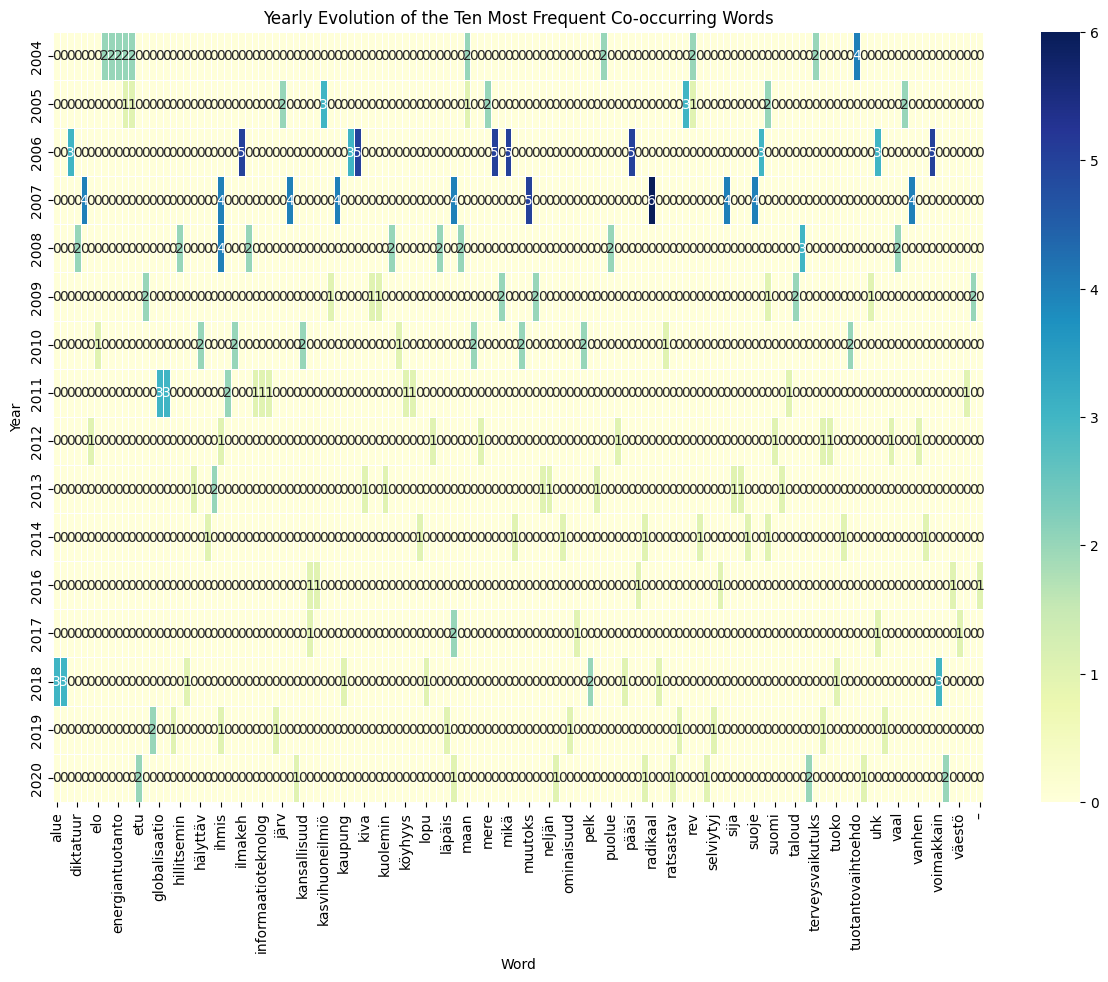

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the results and create a DataFrame
data = []
for year, top_words in results.items():
    for word, freq in top_words:
        data.append({'Year': year, 'Word': word, 'Frequency': freq})

df_heatmap = pd.DataFrame(data)

# Pivot the DataFrame to get words as columns, years as rows, and frequencies as values
heatmap_data = df_heatmap.pivot(index='Year', columns='Word', values='Frequency')

# Fill NaN values with 0 if any, since not all words may appear every year
heatmap_data = heatmap_data.fillna(0)

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", linewidths=.5, cmap="YlGnBu")

# Set the title and show the plot
plt.title('Yearly Evolution of the Ten Most Frequent Co-occurring Words')
plt.show()

# Save the heatmap data to a CSV file 
heatmap_data.to_csv('yearly_evolution_heatmap.csv')


In [33]:
#Section 7
import pandas as pd
import nltk
nltk.download('punkt')

# Load the dataset
df = pd.read_csv('data/filtered_threads.csv')

# Function to calculate the number of tokens in the discussion part of a thread title
def count_tokens_in_discussion(title):
    # Split the title into tokens and count them
    tokens = nltk.word_tokenize(title)
    return len(tokens)

# Initialize a dictionary to store the discussion scores for each year
discussion_scores = {year: [] for year in range(2001, 2021)}

# Loop through the dataset
for index, row in df.iterrows():
    year = int(row['datetime'][:4])
    discussion_title = row['title']
    discussion_part = row['thread_text']  
    discussion_score = count_tokens_in_discussion(discussion_part)
    discussion_scores[year].append((discussion_title, discussion_part, discussion_score))

# Sort and rank the threads based on the discussion score
for year in discussion_scores:
    discussion_scores[year].sort(key=lambda x: x[2], reverse=True)

# Save the top-ranked threads to a separate database file and add your own perceptions
top_threads = {}
for year in discussion_scores:
    top_threads[year] = discussion_scores[year][:5]  # Get the top 5 threads for each year

# Save the top-ranked threads and your own perceptions to a database file
with open('top_ranked_threads_and_perceptions.txt', 'w', encoding='utf-8') as file:
    for year, threads in top_threads.items():
      if not threads==[]:
        file.write(f"Year: {year}\n")
        for title, thread, score in threads:
            file.write(f"Discussion Score: {score}\n")
            file.write(f"Thread Title: {title}\n")
            file.write(f"Thread text: {thread}\n")
            file.write("Our Perception: []\n")
            file.write("\n")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aghaffar23\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
#Section 8

import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
import openpyxl
from openpyxl import Workbook

# Loading the dataset
df = pd.read_csv('data/filtered_threads.csv')

# Function to preprocess and tokenize text
def preprocess_text(text):
    if isinstance(text, str):
    #Preprocessing was done before, now only tokenizing
      tokens = gensim.utils.simple_preprocess(text)
      return tokens

    else:
        # Handling missing or invalid text data
        return []

# Preparing data for topic modeling
documents_by_year = {}  # Separating documents for each year
for year in range(2001, 2021):
    year_data = df[df['datetime'].str.startswith(str(year))]
    documents = [preprocess_text(thread) for thread in year_data['title'] + ' ' + year_data['thread_text']]
    documents_by_year[year] = documents

# Creating a dictionary and a corpus
dictionary_by_year = {}  # Separating dictionary for each year
corpus_by_year = {}  # Separating corpus for each year

for year, documents in documents_by_year.items():
    dictionary = corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    dictionary_by_year[year] = dictionary
    corpus_by_year[year] = corpus

# Performing LDA topic modeling for each year
num_topics = 2
num_keywords = 5
lda_models = {}  # Separating LDA models for each year
for year, corpus in corpus_by_year.items():

    if not corpus:
        print(f"Corpus for year {year} is empty, skipping...")
        continue

    # LDA modeling for non-empty corpus

    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary_by_year[year], passes=15)
    lda_models[year] = lda_model

# Function to get the top keywords for each topic
def get_topic_keywords(lda_model, num_keywords):
    topic_keywords = []
    for topic_id in range(num_topics):
        keywords = [word for word, prob in lda_model.show_topic(topic_id, topn=num_keywords)]
        topic_keywords.append(keywords)
    return topic_keywords

# Creating an Excel workbook to store the results
workbook = Workbook()
worksheet = workbook.active

# Adding headers to the Excel table
headers = ["Year", "Topic 1 Keywords", "Topic 2 Keywords"]
worksheet.append(headers)

# Populate the Excel table with topic modeling results for each year
for year in range(2001, 2021):
    lda_model = lda_models.get(year)
    if lda_model:
        topic_keywords = get_topic_keywords(lda_model, num_keywords)
        row_data = [year] + topic_keywords[0] + topic_keywords[1]
        worksheet.append(row_data)

# Save the results to an Excel file
workbook.save("topic_modeling_results.xlsx")

print("Topic modeling results have been saved to 'topic_modeling_results.xlsx'.")

Topic modeling results have been saved to 'topic_modeling_results.xlsx'.


In [8]:
#Section 9

import pandas as pd
from afinn_1 import Afinn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import openpyxl
from openpyxl import Workbook

# Load your data from 'data/filtered_threads.csv'
df = pd.read_csv('data/filtered_threads.csv')

# Create an AFINN sentiment analyzer for Finnish language
afinn = Afinn(language='fi')

# Define sentiment thresholds for classification
s_threshold = 0  # Adjust as needed

# Function to classify text based on sentiment
def classify_sentiment(text):
    sentiment_score = afinn.score(text)
    if sentiment_score >= s_threshold:
        return 'positive'
    else:
        return 'negative'
    
# Preparing data for topic modeling
documents_by_year = {}  # Separating documents for each year
for year in range(2001, 2021):
    year_data = df[df['datetime'].str.startswith(str(year))]
    documents = [preprocess_text(thread) for thread in year_data['title'] + ' ' + year_data['thread_text']]
    documents_by_year[year] = documents

# Create separate dataframes for positive and negative sentiments
df['sentiment'] = df['title'] + ' ' + df['thread_text'].apply(classify_sentiment)
positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']

# Group positive and negative sentiments by year and concatenate statements
positive_statements = positive_df.groupby(df['datetime'].str[:4])['sentiment'].apply(' '.join).reset_index()
negative_statements = negative_df.groupby(df['datetime'].str[:4])['sentiment'].apply(' '.join).reset_index()


# # Perform topic modeling on positive sentiment statements
# perform_topic_modeling(df[df['sentiment'] == 'positive'], "positive_topic_modeling_results.xlsx", num_topics, num_keywords)

# # Perform topic modeling on negative sentiment statements
# perform_topic_modeling(df[df['sentiment'] == 'negative'], "negative_topic_modeling_results.xlsx", num_topics, num_keywords)
# # Perform topic modeling on positive sentiment statements
# positive_topics = {}
# for year, statements in zip(positive_statements['datetime'], positive_statements['sentiment']):
#     # Perform topic modeling for positive sentiments in each year
#     # ...

# # Perform topic modeling on negative sentiment statements
# negative_topics = {}
# for year, statements in zip(negative_statements['datetime'], negative_statements['sentiment']):
#     # Perform topic modeling for negative sentiments in each year
#     # ...

# # Save positive and negative sentiment statements to separate files
# positive_statements.to_csv('positive_sentiments.csv', index=False)
# negative_statements.to_csv('negative_sentiments.csv', index=False)

# # Save topic modeling results to separate files or a database
# # ...

KeyboardInterrupt: 

In [2]:
#Section 9

import pandas as pd
from afinn_1 import Afinn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import openpyxl
from openpyxl import Workbook
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

with open('finnish_stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords_list = file.read().splitlines()

def preprocess_text(text):
    text = str(text)
    tokens = word_tokenize(text)
    filtered_tokens = [stemmer.stem(word) for word in tokens if not any(char in word for char in string.punctuation) and word not in stopwords_list and not any(char.isdigit() for char in word)]
    
    return ' '.join(filtered_tokens)

# Load your data from 'data/filtered_threads.csv'
df = pd.read_csv('data/filtered_threads.csv')

a = df.head()

nltk.download('punkt')

#Create a Finnish instance
stemmer = SnowballStemmer("finnish")

# Function to remove stopwords, punctuation, numbers, and check if the keyword is in the text
a.loc[:, 'thread_text'] = a['thread_text'].apply(preprocess_text)
print(a['thread_text'])

0    korjaantum muutam päivä katso iku ulos huomas ...
1    sano sanok ihmis teil tarj tode hyöty raha ter...
2    syytäk oljy mere syytäk oljy mere eihä vet tar...
3    onnellisuus ihm eläm il näke sammuv kynttil vi...
4    japanilais opettav ranskalais tekem työtä luit...
Name: thread_text, dtype: object


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aghaffar23\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
